In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## load data

In [143]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

## 查看数据

In [144]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [146]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [147]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [149]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## EDA

### 1.数据整体分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F898D01CC0>,
      dtype=object)

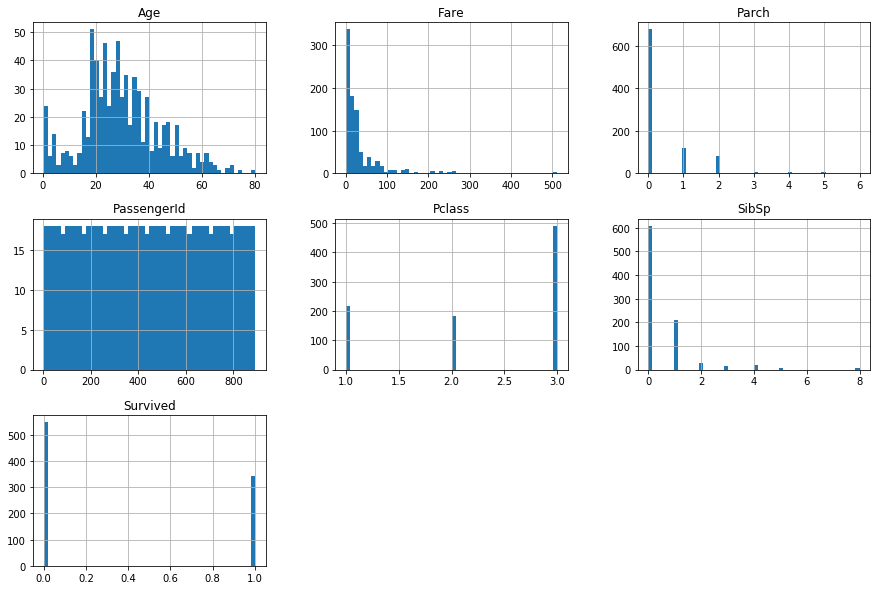

In [150]:
data_train.hist(bins=50,figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F89E5AE940>,
      dtype=object)

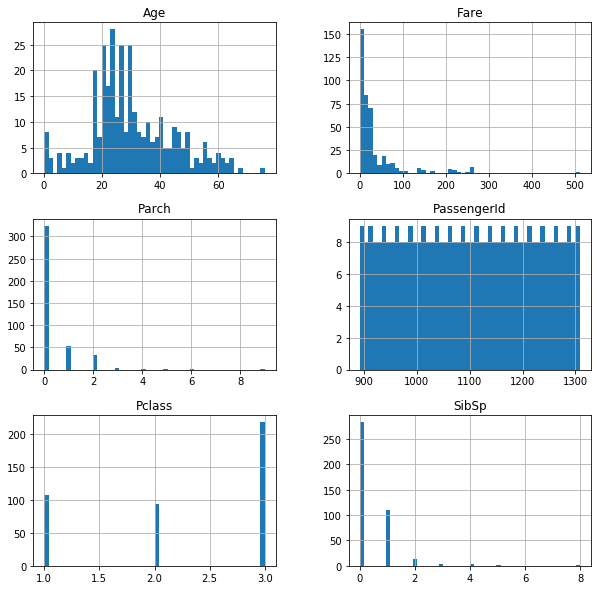

In [151]:
data_test.hist(bins=50,figsize=(10,10))

### 2.数据相关性

In [152]:
train_corr=data_train.drop("PassengerId",axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


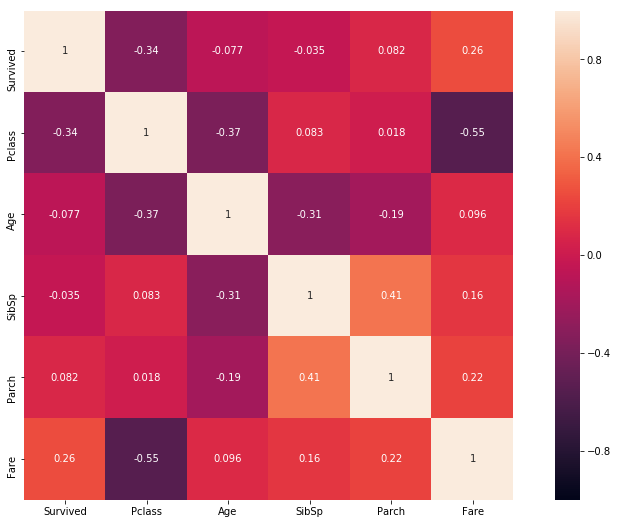

In [153]:
a=plt.subplots(figsize=(15,9))
a=sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F899E8F588>,
      dtype=object)

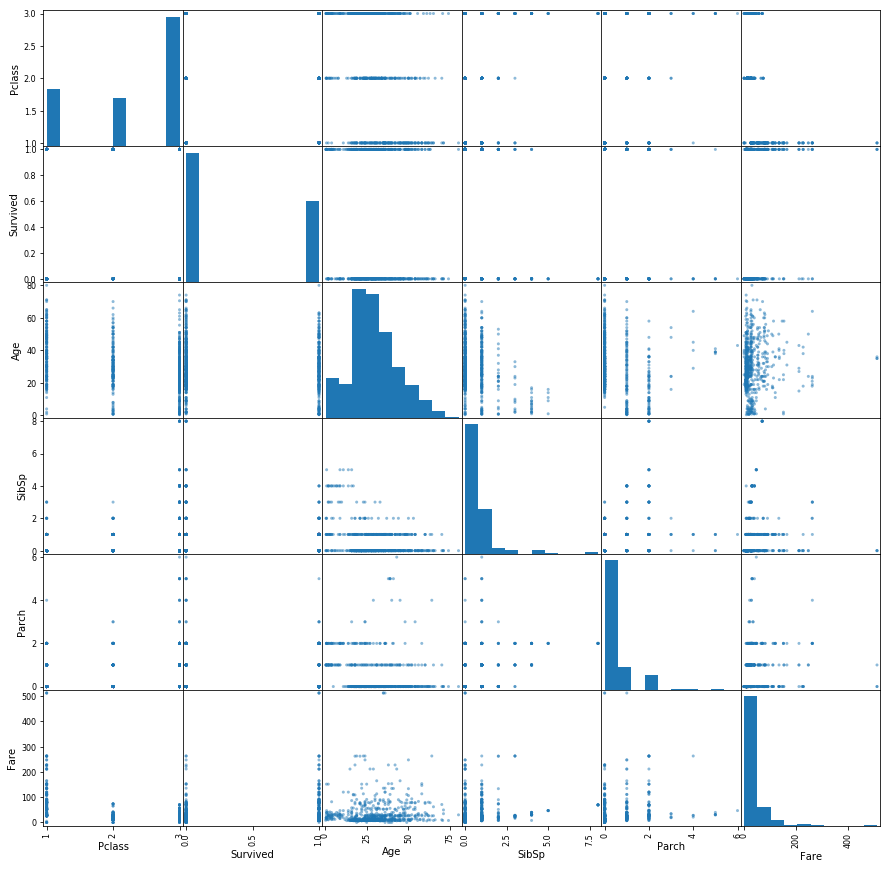

In [154]:
from pandas.tools.plotting import scatter_matrix
attributes=["Pclass",'Survived','Age','SibSp','Parch','Fare']
scatter_matrix(data_train[attributes],figsize=(15,15))

### 3. 数据与结果之间关系

In [155]:
data_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

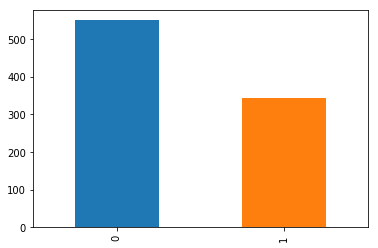

In [156]:
data_train['Survived'].value_counts().plot(kind='bar')

In [157]:
data_train.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


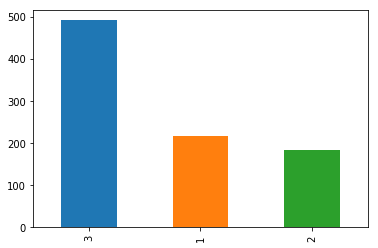

In [158]:
data_train["Pclass"].value_counts().plot(kind="bar")

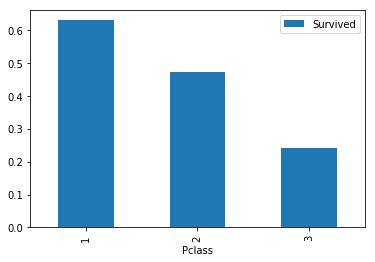

In [159]:
data_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot(kind="bar")

In [160]:
data_train.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [161]:
data_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

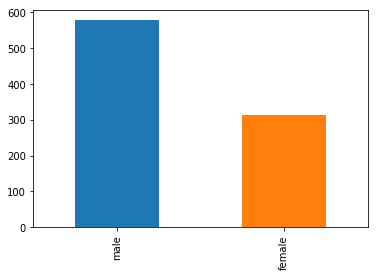

In [162]:
data_train["Sex"].value_counts().plot(kind='bar')

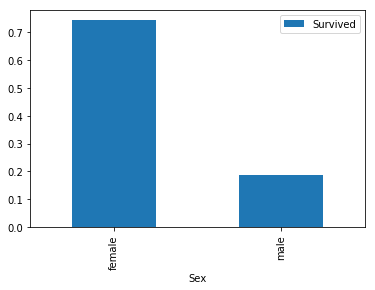

In [163]:
data_train[['Sex','Survived']].groupby("Sex").mean().plot(kind='bar')

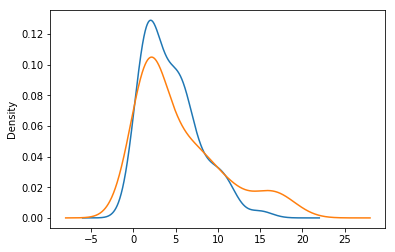

In [164]:
data_train.where(data_train["Survived"]==1)["Age"].value_counts().plot(kind="kde")
data_train.where(data_train["Survived"]==0)["Age"].value_counts().plot(kind="kde")

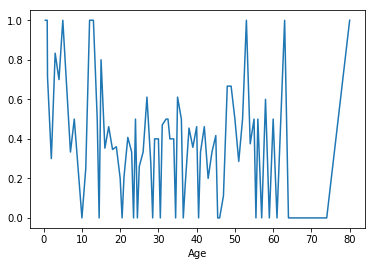

In [165]:
data_train.groupby("Age")["Survived"].mean().plot()

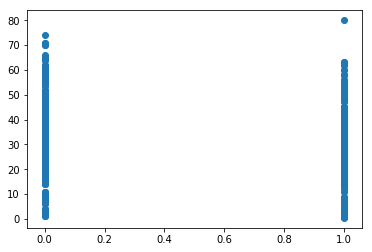

In [166]:
plt.scatter(data_train.Survived, data_train.Age)

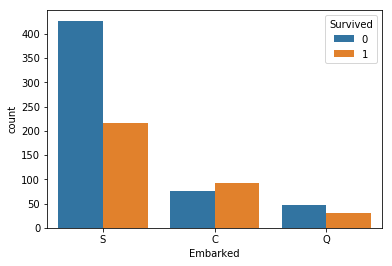

In [167]:
sns.countplot('Embarked',hue="Survived",data=data_train)

## 特征处理

In [168]:
data_test['Survived']=0
train_test=data_train.append(data_test)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [169]:
# from sklearn.preprocessing import Imputer
# imputer=Imputer(strategy='median')
# imputer.fit(data_train.Age.reshape(-1,1))

In [170]:
train_test=pd.get_dummies(train_test,columns=['Pclass'])
train_test=pd.get_dummies(train_test,columns=['Sex'])

In [171]:
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']

In [172]:
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch']) 

In [173]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

In [174]:
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [175]:
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [176]:
train_test = pd.get_dummies(train_test,columns=['Name1'])

In [177]:
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])
Name2_sum=train_test["Name2"].value_counts().reset_index()
Name2_sum.columns=["Name2","Name2_sum"]
train_test=pd.merge(train_test,Name2_sum,how="left",on="Name2")

In [178]:
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']

In [179]:
train_test = pd.get_dummies(train_test,columns=['Name2_new'])

In [180]:
del train_test['Name']

In [181]:
train_test["Fare"].fillna(14.435422,inplace=True)

In [182]:
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [183]:
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [184]:
# 用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [185]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()
lin.fit(missing_age_X_train,missing_age_Y_train)

#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [186]:
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])

train_test = pd.get_dummies(train_test,columns=['Age'])

In [187]:
train_test.drop('Cabin',axis=1,inplace=True)

In [188]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

In [189]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)

data_test["Survived"] = rf.predict(test_data_X)
RF = data_test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

In [192]:
lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_data_X_sd, train_data_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [193]:
clf.grid_scores_

[mean: 0.85085, std: 0.02253, params: {'C': 0.001, 'max_iter': 100},
 mean: 0.85085, std: 0.02253, params: {'C': 0.001, 'max_iter': 250},
 mean: 0.86424, std: 0.02698, params: {'C': 0.01, 'max_iter': 100},
 mean: 0.86424, std: 0.02698, params: {'C': 0.01, 'max_iter': 250},
 mean: 0.86077, std: 0.03033, params: {'C': 0.1, 'max_iter': 100},
 mean: 0.86077, std: 0.03033, params: {'C': 0.1, 'max_iter': 250},
 mean: 0.85457, std: 0.03421, params: {'C': 1, 'max_iter': 100},
 mean: 0.85457, std: 0.03421, params: {'C': 1, 'max_iter': 250},
 mean: 0.84956, std: 0.03537, params: {'C': 10, 'max_iter': 100},
 mean: 0.84956, std: 0.03537, params: {'C': 10, 'max_iter': 250}]

In [194]:
clf.best_params_

{'C': 0.01, 'max_iter': 100}

In [203]:
from sklearn import svm
svc=svm.SVC()

In [205]:
svc = svm.SVC(C=1,max_iter=250)

# 训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
svc.predict(test_data_X_sd)

# 打印结果
data_test["Survived"] = svc.predict(test_data_X_sd)
SVM = data_test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1.csv')

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
